In [18]:
import numpy as np
import pandas as pd
import pathlib

import os
import gc

!pip install fastai==2.6.3
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import fastai
fastai.__version__

'2.6.3'

In [17]:
! unzip '/content/drive/MyDrive/flowers.zip'

Archive:  /content/drive/MyDrive/flowers.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [20]:
data_path = '/content/flowers'

In [21]:
tfms_for_item = RandomResizedCrop(128, min_scale=0.35)

tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_folder(data_path, item_tfms=tfms_for_item, 
                                    batch_tmfs=tfms_for_batch, valid_pct=0.15, shuffle=True)

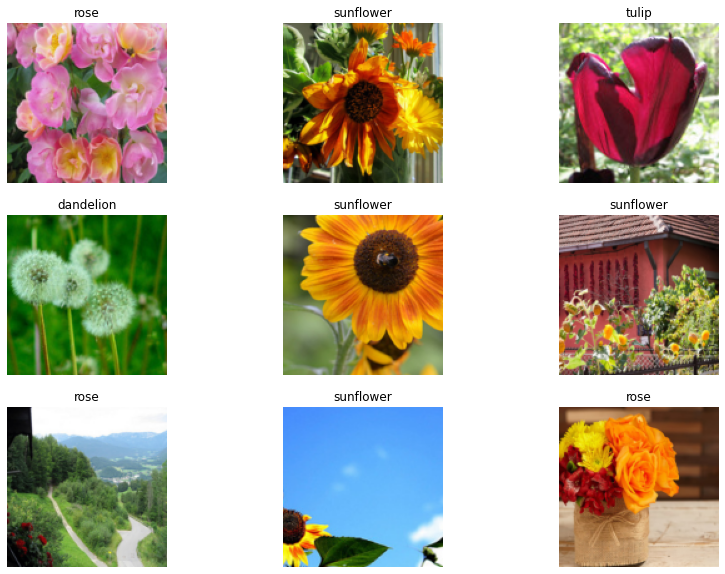

In [22]:
data.show_batch(figsize=(14,10))

In [23]:
print('Number of classes', data.c)

Number of classes 5


In [24]:
model=cnn_learner(data,xresnet50_deeper, metrics=accuracy, model_dir='tmp/model/')

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(valley=0.0012022644514217973)

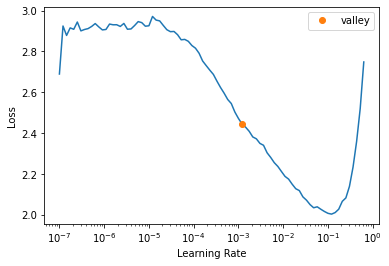

In [25]:
model.lr_find()

In [26]:
model.fit_one_cycle(10,0.0006918)

epoch,train_loss,valid_loss,accuracy,time
0,1.818032,1.103738,0.658951,12:33
1,1.357482,0.934783,0.700617,12:35
2,1.079163,0.805426,0.720679,13:13
3,0.928675,0.750799,0.739198,13:11
4,0.817105,0.668308,0.773148,13:23
5,0.753442,0.628106,0.780864,13:03
6,0.685577,0.645951,0.776235,13:04
7,0.641718,0.618867,0.782407,12:51
8,0.595498,0.608140,0.783951,13:07
9,0.575505,0.604413,0.788580,13:07


In [27]:
model.save('flower_model.pkl')

Path('/content/flowers/tmp/model/flower_model.pkl.pth')

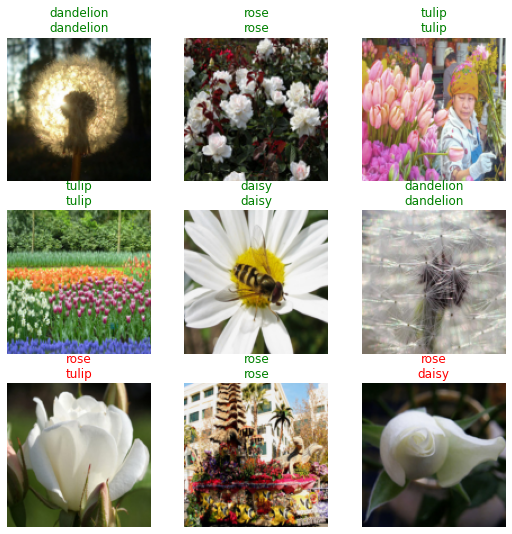

In [28]:
model.show_results()

In [29]:
interp2=ClassificationInterpretation.from_learner(model)

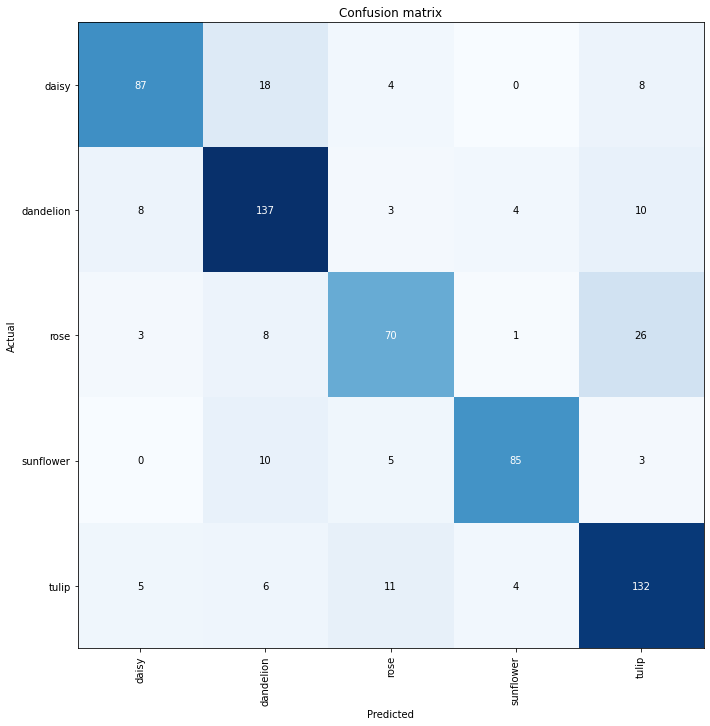

In [30]:
interp2.plot_confusion_matrix(figsize=(15,10))

In [31]:
interp2.most_confused(min_val=2)

[('rose', 'tulip', 26),
 ('daisy', 'dandelion', 18),
 ('tulip', 'rose', 11),
 ('dandelion', 'tulip', 10),
 ('sunflower', 'dandelion', 10),
 ('daisy', 'tulip', 8),
 ('dandelion', 'daisy', 8),
 ('rose', 'dandelion', 8),
 ('tulip', 'dandelion', 6),
 ('sunflower', 'rose', 5),
 ('tulip', 'daisy', 5),
 ('daisy', 'rose', 4),
 ('dandelion', 'sunflower', 4),
 ('tulip', 'sunflower', 4),
 ('dandelion', 'rose', 3),
 ('rose', 'daisy', 3),
 ('sunflower', 'tulip', 3)]